# Le modèle LARS (Least Angle Regression)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoLars, lars_path
from sklearn.metrics import mean_squared_error


## Génération des données synthétiques en dimension élevée

In [6]:
np.random.seed(0)  # Pour la reproductibilité des résultats

n_samples = 100   # Nombre d'observations
n_features = 10   # Nombre de variables explicatives

# Génération d'une matrice X de taille (n_samples, n_features)
X = np.random.randn(n_samples, n_features)


In [7]:

# Création de coefficients vrais, avec plusieurs coefficients nuls pour simuler de la parcimonie
true_coef = np.array([1.5, -2.0, 0.0, 0.0, 3.0, 0.0, 0.0, -1.0, 0.0, 2.5])

# Génération de la cible y avec du bruit ajouté
noise = 0.5 * np.random.randn(n_samples)
y = X.dot(true_coef) + noise


## Entraînement du modèle LARS avec LassoLars

In [8]:
# On utilise alpha=0.0 pour obtenir la trajectoire complète du LARS path.
model = LassoLars(alpha=0.0)
model.fit(X, y)

# Prédiction sur l'ensemble d'entraînement
y_pred = model.predict(X)

# Calcul de l'erreur quadratique moyenne pour évaluer la performance
mse = mean_squared_error(y, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse:.3f}")


Erreur quadratique moyenne (MSE) : 0.169



## Affichage de la comparaison entre les valeurs réelles et les valeurs prédites


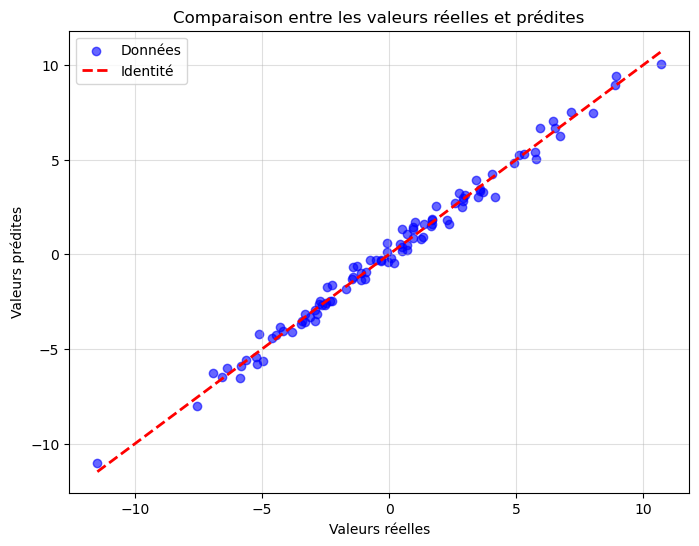

In [9]:

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.6, label='Données')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Identité')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Comparaison entre les valeurs réelles et prédites')
plt.legend()
plt.grid(alpha=0.4)
plt.show()



## Extraction et affichage du chemin d'évolution des coefficients (LARS path)


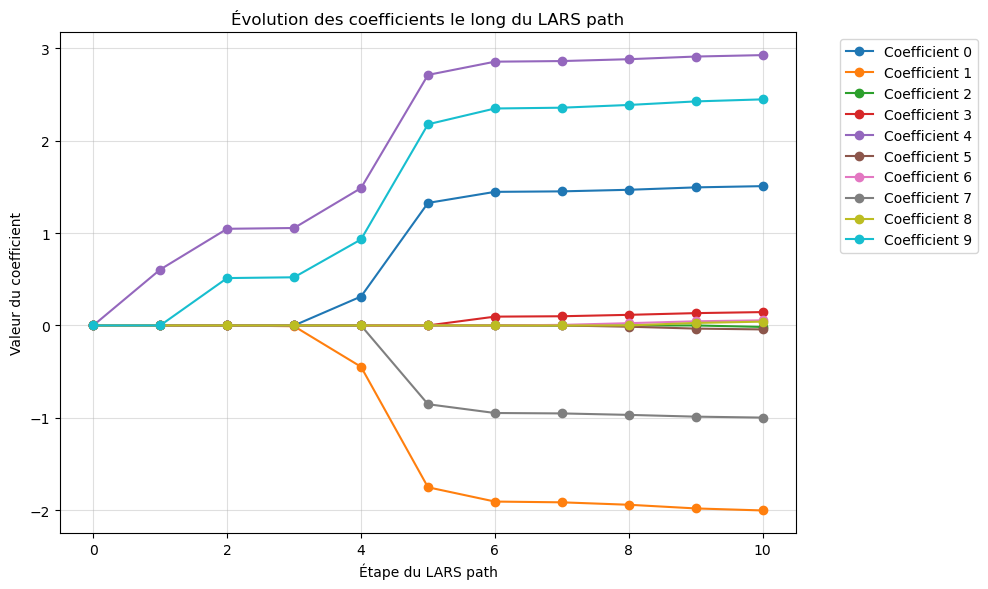

In [11]:

# La fonction lars_path retourne les alphas, les indices actifs et le chemin complet des coefficients
alphas, active, coefs = lars_path(X, y, method='lasso')

# Nombre d'étapes de la trajectoire
n_steps = coefs.shape[1]

plt.figure(figsize=(10, 6))
# Pour chaque coefficient, on trace l'évolution le long des étapes
for i in range(n_features):
    plt.plot(range(n_steps), coefs[i, :], marker='o', linestyle='-', label=f'Coefficient {i}')
plt.xlabel('Étape du LARS path')
plt.ylabel('Valeur du coefficient')
plt.title("Évolution des coefficients le long du LARS path")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Légende placée à droite
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()